# Exercises

In [1]:
# from __future__ import division
import itertools

# import warnings
# warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [2]:
from env import host, username, password

def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


In [3]:
url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = df[["Grocery", "Milk", "Fresh"]]
grocery_milk_fresh.head(2)

,Grocery,Milk,Fresh
customer_id,,,
0,7561,9656,12669
1,9568,9810,7057


In [5]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(grocery_milk_fresh)

# Use the scaler
grocery_milk_fresh = scaler.transform(grocery_milk_fresh)
grocery_milk_fresh

array([[0.08146416, 0.13072723, 0.11294004],
       [0.10309667, 0.13282409, 0.06289903],
       [0.08278992, 0.11918086, 0.05662161],
       ...,
       [0.32594285, 0.21013575, 0.1295431 ],
       [0.02402535, 0.02622442, 0.091727  ],
       [0.02702178, 0.02237109, 0.02482434]])

In [6]:
# Make the object
dbsc = DBSCAN(eps = .20, min_samples = 20)

# Fit the object
dbsc.fit(grocery_milk_fresh)

DBSCAN(eps=0.2, min_samples=20)

In [7]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Grocery", "Milk", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(grocery_milk_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh
0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940
1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899
2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622
3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254
4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626


In [8]:
# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    432
-1      8
Name: labels, dtype: int64

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh,labels
0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940,0
1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899,0
2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622,0
3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254,0
4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626,0


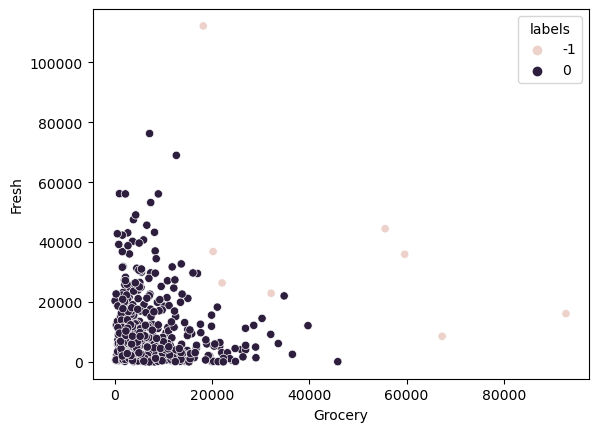

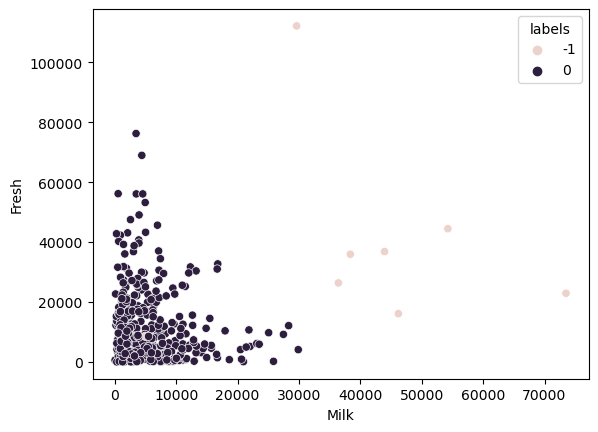

In [10]:
sns.scatterplot(x=df.Grocery, y=df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(x=df.Milk, y=df.Fresh, hue=df.labels)
plt.show()


In [11]:
print(df.head())  # Print the first few rows of the DataFrame to check the data

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Scaled_Grocery  Scaled_Milk  Scaled_Fresh  labels  
0        1338        0.081464     0.130727      0.112940       0  
1        1776        0.103097     0.132824      0.062899       0  
2        7844        0.082790     0.119181      0.056622       0  
3        1788        0.045464     0.015536      0.118254       0  
4        5185        0.077552     0.072914      0.201626       0  


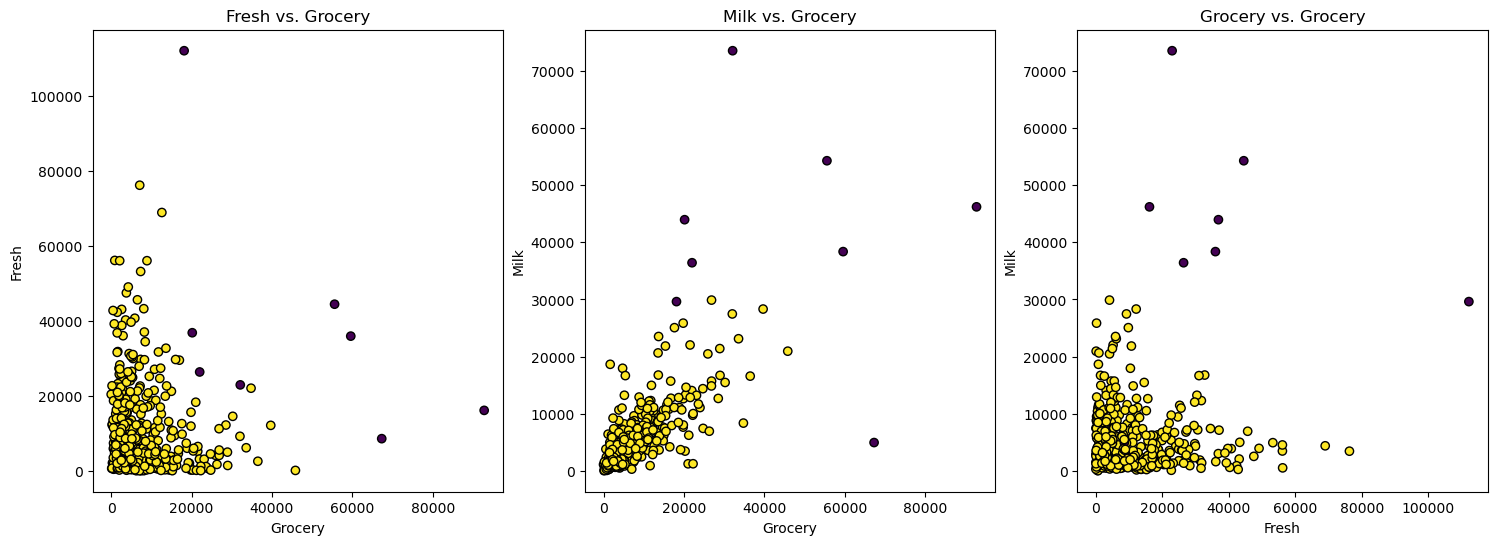

In [12]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots for Fresh, Milk, and Grocery
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create a scatter plot for 'Fresh' in the first subplot
axs[0].scatter(df.Grocery, df.Fresh, c=df.labels, edgecolor='k')
axs[0].set_xlabel('Grocery')
axs[0].set_ylabel('Fresh')
axs[0].set_title('Fresh vs. Grocery')

# Create a scatter plot for 'Milk' in the second subplot
axs[1].scatter(df.Grocery, df.Milk, c=df.labels, edgecolor='k')
axs[1].set_xlabel('Grocery')
axs[1].set_ylabel('Milk')
axs[1].set_title('Milk vs. Grocery')

# Create a scatter plot for 'Grocery' in the third subplot
axs[2].scatter(df.Fresh, df.Milk, c=df.labels, edgecolor='k')
axs[2].set_xlabel('Fresh')
axs[2].set_ylabel('Milk')
axs[2].set_title('Grocery vs. Grocery')

plt.show()

## Experiment with the DBSCAN properties

- Read up on the epsilon and min_samples arguments into DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- Experiment with altering the epsilon values (the eps argument holding the threshhold parameter). Run the models and visualize the results. What has changed? Why do you think that is?
- Double the min_samples parameter. Run your model and visualize the results. Consider what changed and why.

## Clustering - DBSCAN
* Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is **grocery_db**. ✔️
  
* Use DBSCAN to detect anomalies in requests from the curriculum access logs in the **curriculum_logs** database.
  
* Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [19]:
import os
from env import get_connection

In [25]:
# Constant (to generate filename for csv)
filename = 'curriculum_logs_data_two.csv'

# Acquire data.
# ----------------------ACQUIRE FUNCTION---------------------------------
def acquire_curlogs_two():

    '''
    function created to search/retrieve curriculum_logs for codeup exercise
    '''

    if os.path.isfile(filename):
        # If the CSV file exists, read it directly
        return pd.read_csv(filename)
        
    else: 
        query = '''
                SELECT date, path AS endpoint, user_id, cohort_id, ip AS source_ip, name
                FROM cohorts
                LEFT JOIN logs ON cohorts.id = logs.user_id;
                '''

        url = get_connection('curriculum_logs')
                
        df = pd.read_sql(query, url)

        # Convert the 'date' column to datetime format
        df['date'] = pd.to_datetime(df['date'])
        
        # Define the date range
        # start_date = '2018-03-01'
        # end_date = '2019-03-31'

        # Filter the DataFrame to include only rows within the desired date range
        # filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

        # save the filtered DataFrame to CSV
        df.to_csv(filename, index=False)

        return df

In [26]:
df = acquire_curlogs_two()
df.head()

,date,endpoint,user_id,cohort_id,source_ip,name
0,2018-02-01,spring/fundamentals/form-model-binding,1,8.0,97.105.19.61,Arches
1,2018-02-01,javascript-ii/es6,1,8.0,97.105.19.61,Arches
2,2018-02-01,javascript-ii,1,8.0,97.105.19.61,Arches
3,2018-02-01,/,1,8.0,97.105.19.61,Arches
4,2018-01-31,javascript-i/arrays,1,8.0,97.105.19.61,Arches


In [27]:
df.shape

(73739, 6)